In [16]:
import numpy as np
from scipy.stats import norm
from itertools import groupby
import matplotlib.pyplot as plt

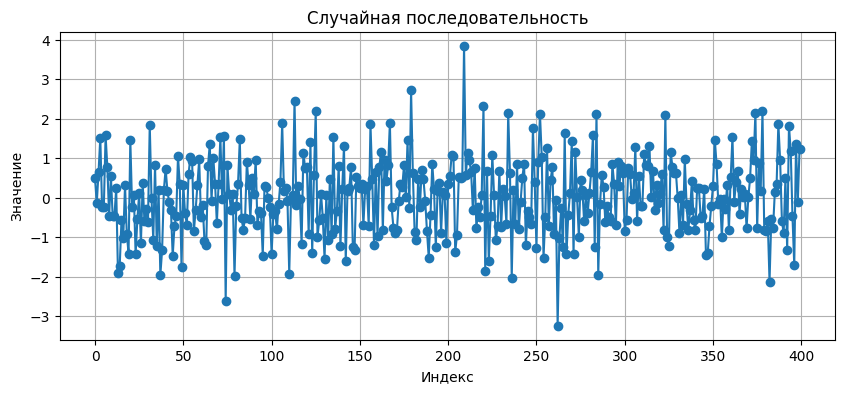

In [17]:
np.random.seed(42)  
n = 400
data = np.random.randn(n) 

plt.figure(figsize=(10, 4))
plt.plot(range(n), data, marker='o', linestyle='-')
plt.title('Случайная последовательность')
plt.xlabel('Индекс')
plt.ylabel('Значение')
plt.grid(True)
plt.show()

In [19]:
num_intervals = 20
interval_size = n // num_intervals
intervals = np.array_split(data, num_intervals)

means = [np.mean(interval) for interval in intervals]
variances = [np.var(interval, ddof=1) for interval in intervals]

print("Средние интервалов:\t", np.round(means,3))
print("Дисперсии интервалов:\t", np.round(variances,3))

Средние интервалов:	 [-0.171 -0.266 -0.027 -0.031 -0.024  0.044 -0.113  0.047  0.342 -0.208
  0.424 -0.045  0.128 -0.346  0.164  0.275  0.048 -0.211  0.448 -0.026]
Дисперсии интервалов:	 [0.922 0.937 0.674 1.237 0.477 1.046 1.144 0.816 1.009 0.54  1.161 1.407
 1.066 1.252 0.899 0.407 0.743 0.526 0.78  1.336]


In [23]:
def series_test(data, alpha=0.05):
    runs = [len(list(v)) for k, v in groupby(data)]
    n1 = sum([1 for r in runs if r == 1])
    n2 = sum([1 for r in runs if r == 2])
    
    if n1 == 0 or n2 == 0:
        return 1.0, True  
    
    mean_runs = ((2 * n1 * n2) / (n1 + n2)) + 1
    var_runs = (2 * n1 * n2 * (2 * n1 * n2 - n1 - n2)) / ((n1 + n2)**2 * (n1 + n2 - 1))
    
    z = (len(runs) - mean_runs) / np.sqrt(var_runs)
    p_value = 2 * (1 - norm.cdf(abs(z)))
    
    return p_value, p_value < alpha

alpha = 0.1
p_value_series, stationary_series = series_test(data, alpha)

print(f"Критерий серий: p-value = {p_value_series}, Стационарность = {stationary_series}")

if stationary_series:
    print("Реализация процесса стационарна.")
else:
    print("Реализация процесса нестационарна.")

Критерий серий: p-value = 1.0, Стационарность = True
Реализация процесса стационарна.


In [24]:
def inversion_test(data, alpha=0.05):
    n = len(data)
    m = np.sum(data[:-1] > data[1:])  
    expected_m = (n * (n - 1)) / 4
    var_m = (2 * n**2 * (2 * n - 1)) / 24
    z = (m - expected_m) / np.sqrt(var_m)
    p_value = 2 * (1 - norm.cdf(abs(z)))
    
    return p_value, p_value < alpha

alpha = 0.1
p_value_inversion, stationary_inversion = inversion_test(data, alpha)
print(f"Критерий инверсий: p-value = {p_value_inversion}, Стационарность = {stationary_inversion}")

if stationary_inversion:
    print("Реализация процесса стационарна.")
else:
    print("Реализация процесса нестационарна.")

Критерий инверсий: p-value = 0.0, Стационарность = True
Реализация процесса стационарна.


In [11]:
alpha = 0.05  
p_value_series, stationary_series = series_test(data, alpha)
p_value_inversion, stationary_inversion = inversion_test(data, alpha)

print("Средние интервалов:\t", np.round(means,3))
print("Дисперсии интервалов:\t", np.round(variances,3))
print()
print(f"Критерий серий: p-value = {p_value_series}, Стационарность = {stationary_series}")
print(f"Критерий инверсий: p-value = {p_value_inversion}, Стационарность = {stationary_inversion}")

if stationary_series and stationary_inversion:
    print("Реализация процесса стационарна.")
else:
    print("Реализация процесса нестационарна.")

Средние интервалов:	 [-0.171 -0.266 -0.027 -0.031 -0.024  0.044 -0.113  0.047  0.342 -0.208
  0.424 -0.045  0.128 -0.346  0.164  0.275  0.048 -0.211  0.448 -0.026]
Дисперсии интервалов:	 [0.922 0.937 0.674 1.237 0.477 1.046 1.144 0.816 1.009 0.54  1.161 1.407
 1.066 1.252 0.899 0.407 0.743 0.526 0.78  1.336]

Критерий серий: p-value = 1.0, Стационарность = True
Критерий инверсий: p-value = 0.0, Стационарность = True
Реализация процесса стационарна.
